##read the data 
## get the data info and describe the data

In [1]:
import numpy as np
import pandas as pd

# Load the dataset

carlist = pd.read_csv('vehicles.csv')

In [2]:
## read the data info and describe the data 
carlist.info()
carlist.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
count,4.268800e+05,426880,426880,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,...,120519,334022,296677,426812,426810,0.0,426880,420331.000000,420331.000000,426812
unique,NaN,426880,404,413,NaN,NaN,42,29667,6,8,...,4,13,12,241899,360911,NaN,51,NaN,NaN,381536
top,NaN,https://prescott.craigslist.org/cto/d/prescott...,columbus,https://spokane.craigslist.org,NaN,NaN,ford,f-150,good,6 cylinders,...,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,NaN,ca,NaN,NaN,2021-04-23T22:13:05-0400
freq,NaN,1,3608,2988,NaN,NaN,70985,8009,121456,94169,...,63465,87056,79285,7357,231,NaN,50614,NaN,NaN,12
mean,7.311487e+09,NaN,NaN,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN
std,4.473170e+06,NaN,NaN,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.841533,18.365462,NaN
min,7.207408e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN
25%,7.308143e+09,NaN,NaN,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.601900,-111.939847,NaN
50%,7.312621e+09,NaN,NaN,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150100,-88.432600,NaN
75%,7.315254e+09,NaN,NaN,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.398900,-80.832039,NaN


## clean the dataset 
## check the nulls and duplicate data
## check the numeric and categorical values

In [3]:
##check the duplicate data 
carlist.loc[carlist.duplicated()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date


In [4]:
# Dropping the unnecessary columns
carlist.drop(['region_url','image_url','description','county'],inplace=True,axis=1)

In [5]:
####check the numeric columns and categorical value in carlist

num_cols = carlist.select_dtypes(include=[np.number]).columns
cat_cols = carlist.select_dtypes(include=[object]).columns
print(f'numeric columns in carlist:{num_cols}')
print(' ')
print(f'categorical columns in carlist:{cat_cols}')

numeric columns in carlist:Index(['id', 'price', 'year', 'odometer', 'lat', 'long'], dtype='object')
 
categorical columns in carlist:Index(['url', 'region', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'state', 'posting_date'],
      dtype='object')


In [6]:
# Select the 'year' and 'posting_date' columns
selected_cols = carlist[['year', 'posting_date']]

# Fill null values in 'posting_date' with 'Unknown'
carlist['posting_date'].fillna('Unknown', inplace=True)

# Check if 'year' is null and 'posting_date' is not 'Unknown'
mask = (carlist['year'].isnull()) & (carlist['posting_date'] != 'Unknown')

# Extract year from 'posting_date' and update 'year' column
carlist.loc[mask, 'year'] = carlist.loc[mask, 'posting_date'].str.extract(r'(\d{4})')

# Drop rows where 'year' is still null
carlist.dropna(subset=['year'], inplace=True)

# Convert 'year' column to integer
carlist['year'] = carlist['year'].astype(int)

carlist

C:\Users\N\AppData\Local\Temp\ipykernel_7680\4054491323.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  carlist['posting_date'].fillna('Unknown', inplace=True)


,id,url,region,price,year,manufacturer,model,condition,cylinders,fuel,...,transmission,VIN,drive,size,type,paint_color,state,lat,long,posting_date
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,...,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al,32.590000,-85.480000,2021-05-04T12:31:18-0500
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,...,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al,32.590000,-85.480000,2021-05-04T12:31:08-0500
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,...,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al,32.590000,-85.480000,2021-05-04T12:31:25-0500
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,...,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al,32.590000,-85.480000,2021-05-04T10:41:31-0500
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,...,automatic,NaN,rwd,full-size,truck,black,al,32.592000,-85.518900,2021-05-03T14:02:03-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,23590,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,...,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,30590,2020,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,...,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,34990,2020,cadillac,xt4 sport suv 4d,good,NaN,diesel,...,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,28990,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,...,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [7]:
##drop the posting date column
carlist.drop('posting_date',axis=1,inplace=True)

In [8]:
##update the num_col and cat cols

num_cols = carlist.select_dtypes(include=[np.number]).columns
cat_cols = carlist.select_dtypes(include=[object]).columns
print(f'numeric columns in carlist after updating:{num_cols}')
print(' ')
print(f'categorical columns in carlist after updating:{cat_cols}')

numeric columns in carlist after updating:Index(['id', 'price', 'year', 'odometer', 'lat', 'long'], dtype='object')
 
categorical columns in carlist after updating:Index(['url', 'region', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'state'],
      dtype='object')


In [10]:
carlist[num_cols].isna().sum()

id             0
price          0
year           0
odometer    4331
lat         6481
long        6481
dtype: int64

In [11]:
carlist['cylinders'].replace(to_replace=['3 cylinders','4 cylinders','5 cylinders','6 cylinders','8 cylinders','10 cylinders','12 cylinders'
,'other'],value=[3,4,5,6,8,10,12,np.nan],inplace=True)

C:\Users\N\AppData\Local\Temp\ipykernel_7680\135908195.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  carlist['cylinders'].replace(to_replace=['3 cylinders','4 cylinders','5 cylinders','6 cylinders','8 cylinders','10 cylinders','12 cylinders'
C:\Users\N\AppData\Local\Temp\ipykernel_7680\135908195.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `

In [14]:
carlist.shape

(425675, 21)

In [16]:
## fill the null values in cat_col that  else fill with mode

for col in cat_cols:
    carlist[col].fillna(carlist[col].mode()[0], inplace=True)

carlist.isna().sum()

## fill the null values in num_cols with mean

for col in num_cols:
    carlist[col].fillna(carlist[col].mean(), inplace=True)

carlist.isna().sum()

carlist.to_csv('cleaned_vehicles.csv', index=False)



C:\Users\N\AppData\Local\Temp\ipykernel_7680\1446176050.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  carlist[col].fillna(carlist[col].mode()[0], inplace=True)
C:\Users\N\AppData\Local\Temp\ipykernel_7680\1446176050.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

## EDA for the cleaned_vehicles

1.What is the average price of cars by manufacturer?


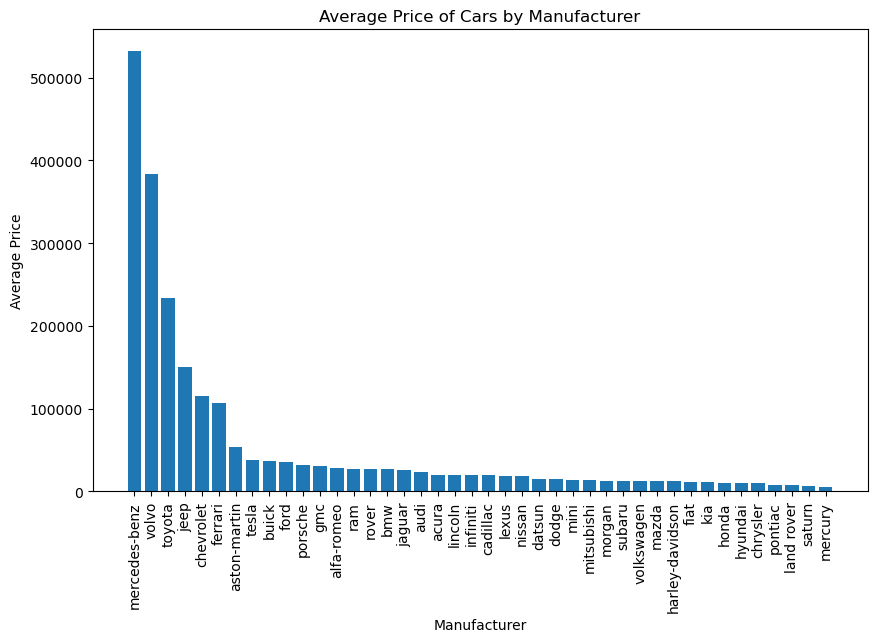

In [18]:
import matplotlib.pyplot as plt

# Calculate average price by manufacturer
avg_price_by_manufacturer = carlist.groupby('manufacturer')['price'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_manufacturer.index, avg_price_by_manufacturer.values)
plt.xticks(rotation=90)
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.title('Average Price of Cars by Manufacturer')
plt.show()

2.Which car model has the highest average price?


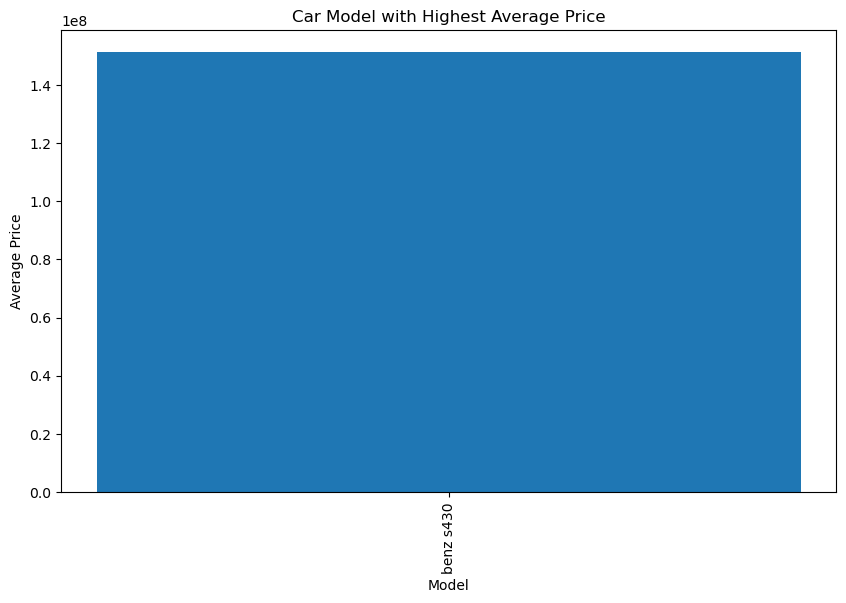

In [ ]:
# Calculate average price by model
avg_price_by_model = carlist.groupby('model')['price'].mean().sort_values(ascending=False)

# Create a card
    
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_model.index[:1], avg_price_by_model.values[:1])
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Average Price')
plt.title('Car Model with Highest Average Price')
plt.show()

3.What is the distribution of car prices by fuel type?


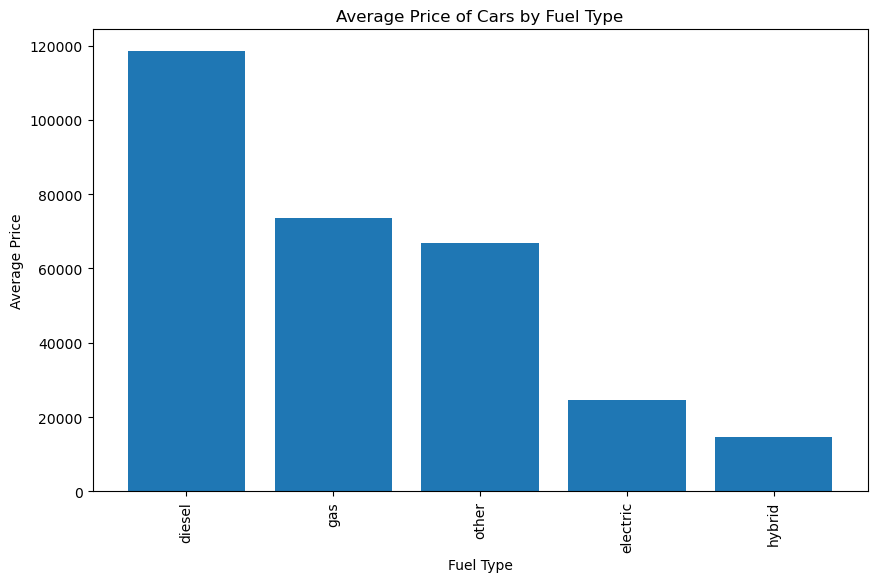

In [21]:
import matplotlib.pyplot as plt

# Calculate average price by fuel type
avg_price_by_fuel = carlist.groupby('fuel')['price'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_fuel.index, avg_price_by_fuel.values)
plt.xticks(rotation=90)
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.title('Average Price of Cars by Fuel Type')
plt.show()

4.Which paint color is most popular among manufacturers?


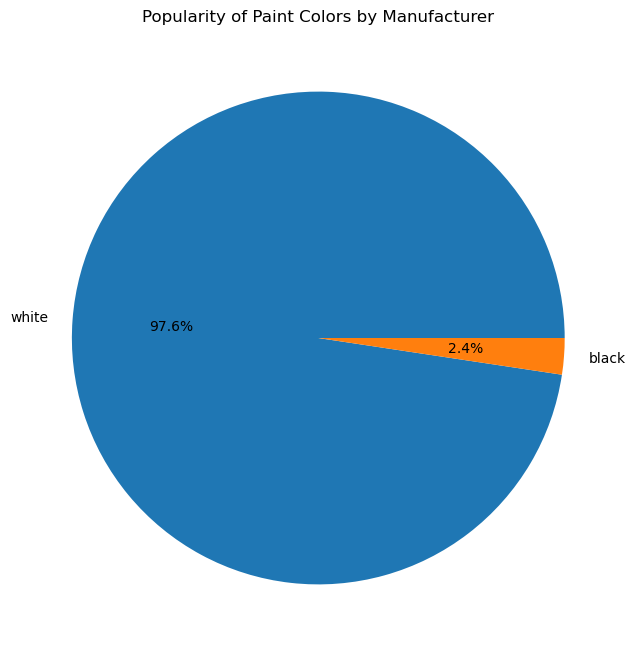

In [22]:
# Calculate popularity by paint color
popularity_by_paint_color = carlist.groupby(['manufacturer', 'paint_color'])['id'].count().unstack().fillna(0)

# Get the most popular paint color for each manufacturer
most_popular_paint_color = popularity_by_paint_color.idxmax(axis=1)

# Count the number of times each paint color is the most popular
popular_paint_counts = most_popular_paint_color.value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(popular_paint_counts, labels=popular_paint_counts.index, autopct='%1.1f%%')
plt.title('Popularity of Paint Colors by Manufacturer')
plt.show()

5.How does the average price change by state?


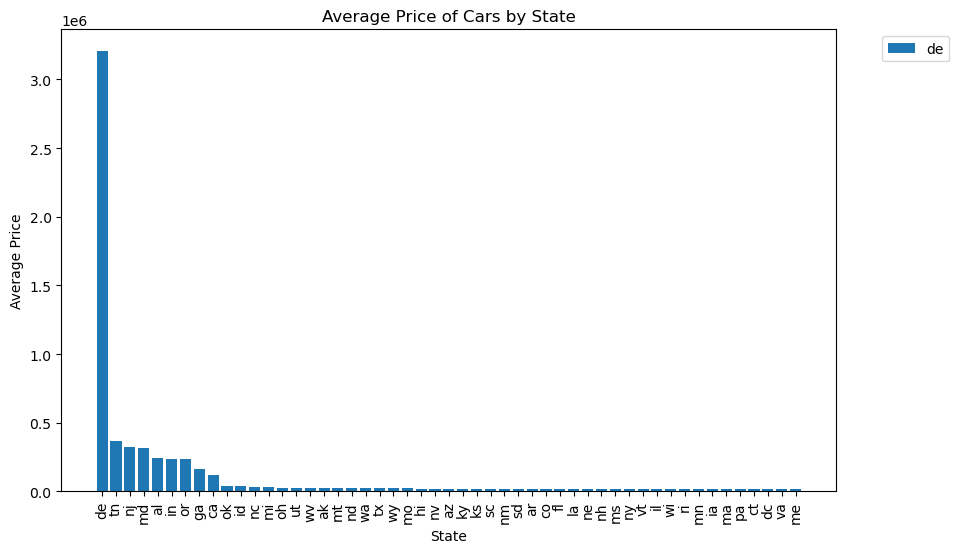

In [24]:
# Calculate average price by state
avg_price_by_state = carlist.groupby('state')['price'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_state.index, avg_price_by_state.values)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average Price')
plt.title('Average Price of Cars by State')

# Add a legend
plt.legend(avg_price_by_state.index, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

6.What is the correlation between car price and mileage?


In [25]:
correlation = carlist['price'].corr(carlist['odometer'])
print(correlation)


0.01003184382209478
